# I. Import libraries

In [24]:
%pip install optuna

In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
import optuna

# II. Read datasets

In [27]:
fpt_df = pd.read_csv('/data/FPT.csv', parse_dates=["Date/Time"])
msn_df = pd.read_csv('/data/MSN.csv', parse_dates=["Date/Time"])
pnj_df = pd.read_csv('/data/PNJ.csv', parse_dates=["Date/Time"])
vic_df = pd.read_csv('/data/VIC.csv', parse_dates=["Date/Time"])

In [28]:
fpt_df.info()
fpt_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB


,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,97406,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,2020-01-21 05:08:51.739112192,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
min,2018-12-25 09:15:00,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,2019-08-06 11:06:15,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,2020-01-31 10:37:30,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,2020-07-14 09:54:45,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,2020-12-22 14:46:00,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0
std,NaN,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0


In [29]:
msn_df.info()
msn_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         135354 non-null  object        
 1   Date/Time      135354 non-null  datetime64[ns]
 2   Open           135354 non-null  float64       
 3   High           135354 non-null  float64       
 4   Low            135354 non-null  float64       
 5   Close          135354 non-null  float64       
 6   Volume         135354 non-null  int64         
 7   Open Interest  135354 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 8.3+ MB


,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,135354,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,2019-07-30 01:41:35.644310528,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
min,2017-12-25 09:15:00,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,2018-10-16 13:15:15,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,2019-08-26 10:44:30,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,2020-05-12 13:20:45,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,2020-12-22 14:46:00,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0
std,NaN,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0


In [30]:
pnj_df.info()
pnj_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         125309 non-null  object        
 1   Date/Time      125309 non-null  datetime64[ns]
 2   Open           125309 non-null  float64       
 3   High           125309 non-null  float64       
 4   Low            125309 non-null  float64       
 5   Close          125309 non-null  float64       
 6   Volume         125309 non-null  int64         
 7   Open Interest  125309 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 7.6+ MB


,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,125309,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
mean,2019-08-19 13:55:12.292173568,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
min,2018-02-28 09:15:00,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,2018-11-15 11:10:00,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,2019-09-05 09:51:00,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,2020-05-11 14:22:00,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0
max,2020-12-22 14:46:00,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0
std,NaN,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0


In [31]:
vic_df.info()
vic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         101266 non-null  object        
 1   Date/Time      101266 non-null  datetime64[ns]
 2   Open           101266 non-null  float64       
 3   High           101266 non-null  float64       
 4   Low            101266 non-null  float64       
 5   Close          101266 non-null  float64       
 6   Volume         101266 non-null  int64         
 7   Open Interest  101266 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 6.2+ MB


,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,101266,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,2019-12-05 15:50:51.577627392,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
min,2018-10-17 09:39:00,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,2019-05-16 13:29:15,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,2019-12-13 11:09:30,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,2020-06-25 10:28:45,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,2020-12-22 14:46:00,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0
std,NaN,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0


# III. Preprocessing data

In [32]:
# Stock format
# Only use closing price and volume
format = {
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
}

In [33]:
# Remove time from date column
fpt_df["Date"] = fpt_df["Date/Time"].dt.date
msn_df["Date"] = msn_df["Date/Time"].dt.date
pnj_df["Date"] = pnj_df["Date/Time"].dt.date
vic_df["Date"] = vic_df["Date/Time"].dt.date

# Group features by date
fpt_df = fpt_df.groupby("Date").agg(format)
msn_df = msn_df.groupby("Date").agg(format)
pnj_df = pnj_df.groupby("Date").agg(format)
vic_df = vic_df.groupby("Date").agg(format)

# Add Close column
fpt_df["Close(t+1)"] = fpt_df.Close.shift(-1)
msn_df["Close(t+1)"] = msn_df.Close.shift(-1)
pnj_df["Close(t+1)"] = pnj_df.Close.shift(-1)
vic_df["Close(t+1)"] = vic_df.Close.shift(-1)

# Add Close Diff column
fpt_df["Close Diff(t+1)"] = fpt_df.Close.diff().shift(-1)
msn_df["Close Diff(t+1)"] = msn_df.Close.diff().shift(-1)
pnj_df["Close Diff(t+1)"] = pnj_df.Close.diff().shift(-1)
vic_df["Close Diff(t+1)"] = vic_df.Close.diff().shift(-1)

# Drop first row
fpt_df.dropna(inplace=True)
msn_df.dropna(inplace=True)
pnj_df.dropna(inplace=True)
vic_df.dropna(inplace=True)

In [34]:
fpt_df.head()

,Open,High,Low,Close,Volume,Close(t+1),Close Diff(t+1)
Date,,,,,,,
2018-12-25,30.89,30.89,30.59,30.66,84960,30.89,0.23
2018-12-26,31.04,31.22,30.89,30.89,333590,31.19,0.30
2018-12-27,31.41,31.52,31.19,31.19,454860,31.49,0.30
2018-12-28,31.34,31.49,31.19,31.49,387170,30.74,-0.75
2019-01-02,31.19,31.45,30.70,30.74,459120,30.44,-0.30


In [35]:
msn_df.head()

,Open,High,Low,Close,Volume,Close(t+1),Close Diff(t+1)
Date,,,,,,,
2017-12-25,73.1,75.4,73.0,74.2,207370,75.5,1.3
2017-12-26,74.9,75.5,74.3,75.5,403710,75.0,-0.5
2017-12-27,74.9,75.7,74.8,75.0,517920,75.7,0.7
2017-12-28,75.0,76.0,74.5,75.7,377030,76.7,1.0
2017-12-29,76.0,77.0,76.0,76.7,226880,80.0,3.3


In [36]:
pnj_df.head()

,Open,High,Low,Close,Volume,Close(t+1),Close Diff(t+1)
Date,,,,,,,
2018-02-28,78.14,80.61,78.09,78.71,8158,77.66,-1.05
2018-03-01,78.14,80.32,77.66,77.66,20511,77.33,-0.33
2018-03-02,77.14,77.90,76.86,77.33,37274,78.28,0.95
2018-03-05,77.14,80.50,77.14,78.28,27737,81.45,3.17
2018-03-06,78.61,83.13,77.43,81.45,41077,80.74,-0.71


In [37]:
vic_df.head()

,Open,High,Low,Close,Volume,Close(t+1),Close Diff(t+1)
Date,,,,,,,
2018-10-17,98.5,99.6,98.3,99.0,1266610,99.1,0.1
2018-10-18,98.5,99.2,98.0,99.1,896140,99.1,0.0
2018-10-19,96.5,99.1,96.5,99.1,915870,99.1,0.0
2018-10-22,98.1,99.6,97.1,99.1,536930,99.0,-0.1
2018-10-23,98.1,99.0,96.5,99.0,608750,98.8,-0.2


## III. Visualize datasets

In [38]:
# List of data and ticker's name
data = [fpt_df, msn_df, pnj_df, vic_df]
tickers = ['FPT', 'MSN', 'PNJ', 'VIC']

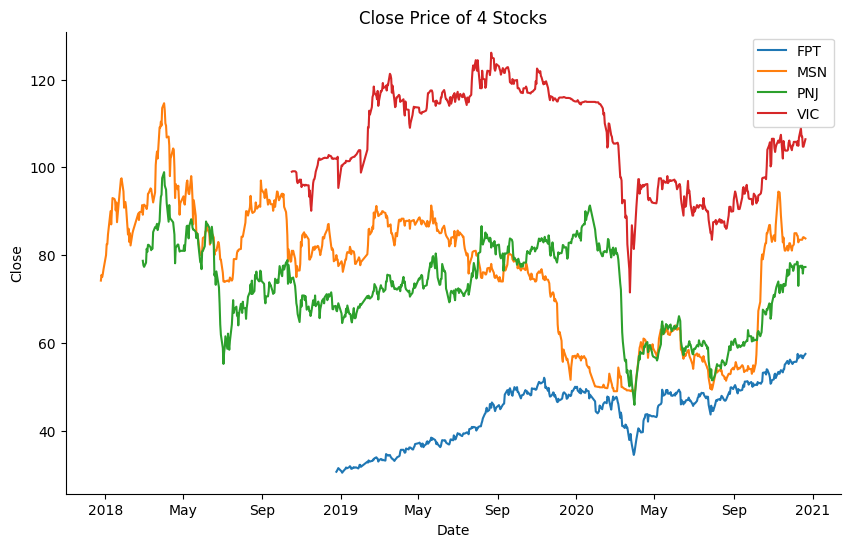

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))

for df, ticker in zip(data, tickers):
  g = sns.lineplot(data=df, x='Date', y ='Close', label=ticker, ax=ax)

sns.despine()
g.xaxis.set_major_formatter(mdates.ConciseDateFormatter(g.xaxis.get_major_locator()))
ax.set_title("Close Price of 4 Stocks")
plt.show()

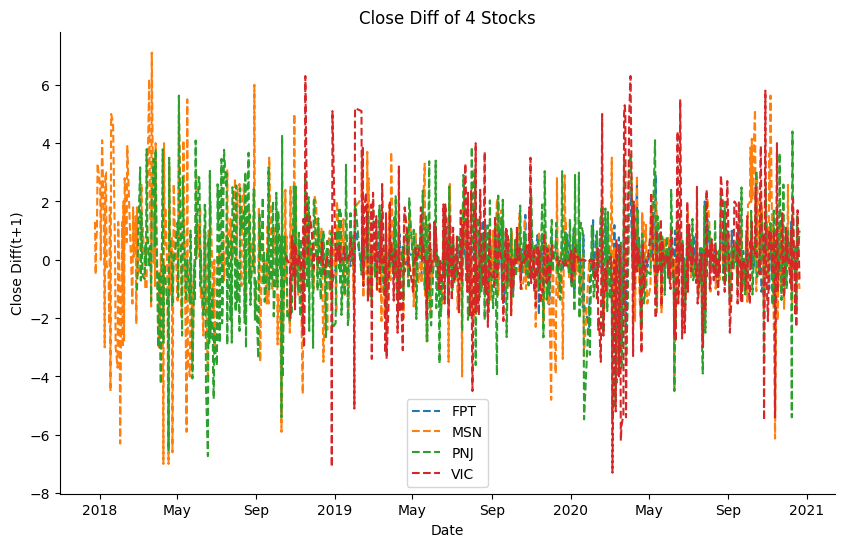

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

for df, ticker in zip(data, tickers):
  g = sns.lineplot(data=df, x='Date', y ='Close Diff(t+1)', linestyle='dashed', label=ticker, ax=ax)

sns.despine()
g.xaxis.set_major_formatter(mdates.ConciseDateFormatter(g.xaxis.get_major_locator()))
ax.set_title("Close Diff of 4 Stocks")
plt.show()

# IV. XGBoost with Optuna

## 1. Predict future price then calculate difference

### Define model class

In [41]:
class Indirect_XGBoost_Model:
  def __init__(self, ticker, df):
        self.ticker = ticker

        df = df.drop('Close Diff(t+1)', axis=1)

        # Scale data
        self.scaler = MinMaxScaler().set_output(transform="pandas")
        df = self.scaler.fit_transform(df)

        X = df.drop('Close(t+1)', axis=1)
        y = df['Close(t+1)']

        split_index = int(len(X) * 0.8)  # 80% of data for training
        self.X_train, self.X_test = X[:split_index], X[split_index:]
        self.y_train, self.y_test = y[:split_index], y[split_index:]

        self.train_dmatrix = xgb.DMatrix(data = self.X_train, label = self.y_train)
        self.test_dmatrix = xgb.DMatrix(data = self.X_test, label = self.y_test)

  def _objective(self, trial):
      params = {
          'device' : 'gpu',
          'sampling_method': 'gradient_based',
          'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]),
          'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
          'subsample': trial.suggest_float('subsample', 0.1, 1.0),
          'max_depth': trial.suggest_int('max_depth', 3, 20),
      }

      n_estimators = params.pop('n_estimators')

      model = xgb.train(params = params, dtrain = self.train_dmatrix, num_boost_round = n_estimators)
      predict = model.predict(self.test_dmatrix)

      r2 = r2_score(self.y_test, predict)
      return r2

  def optimize(self):
    study = optuna.create_study(direction="maximize")
    study.optimize(self._objective, n_trials=100)

    trial = study.best_trial
    print("Number of finished trials: {}".format(len(study.trials)))
    print(f"Best trial: R2 Score = {trial.value}\n")

    best_params = study.best_params
    n_estimators = best_params.pop('n_estimators')

    self.best_model = xgb.train(params = best_params, dtrain = self.train_dmatrix, num_boost_round = n_estimators)

  def eval(self):
    test_df = pd.concat([self.X_test, self.y_test], axis=1)
    inv_test = self.scaler.inverse_transform(test_df)

    inv_close = inv_test[:, 3]

    inv_test = inv_test[:, -1]
    self.inv_test_df = pd.DataFrame({'Close':inv_close, 'Close(t+1)': inv_test}, index=test_df.index)
    self.inv_test_df["Close Diff(t+1)"] = self.inv_test_df['Close(t+1)'] - self.inv_test_df['Close']

    pred = pd.Series(self.best_model.predict(self.test_dmatrix))
    pred.index = self.y_test.index

    pred_df = pd.concat([self.X_test, pred], axis=1)
    inv_pred = self.scaler.inverse_transform(pred_df)
    inv_pred = inv_pred[:, -1]
    self.inv_pred_df = pd.DataFrame({'Close':inv_close, 'Close(t+1)': inv_pred}, index=pred_df.index)
    self.inv_pred_df["Close Diff(t+1)"] = self.inv_pred_df['Close(t+1)'] - self.inv_pred_df['Close']

    print(f"\033[92m Evaluation metrics for {self.ticker}: \x1b[0m")
    print(f"MSE = {mean_squared_error(self.inv_test_df['Close Diff(t+1)'], self.inv_pred_df['Close Diff(t+1)'])}")
    print(f"R2 Score = {r2_score(self.inv_test_df['Close Diff(t+1)'], self.inv_pred_df['Close Diff(t+1)'])}")

  def plot(self):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    sns.lineplot(x=self.inv_test_df.index, y=self.inv_test_df['Close(t+1)'], label="Actual", ax=ax[0])
    sns.lineplot(x=self.inv_pred_df.index, y=self.inv_pred_df['Close(t+1)'], label="Predicted", ax=ax[0], linestyle='dashed')
    ax[0].set_title(f"{self.ticker} Actual vs. Predicted Close Price")

    sns.lineplot(x=self.inv_test_df.index, y=self.inv_test_df['Close Diff(t+1)'], label="Actual", ax=ax[1])
    sns.lineplot(x=self.inv_pred_df.index, y=self.inv_pred_df['Close Diff(t+1)'], label="Predicted", ax=ax[1], linestyle='dashed')
    ax[1].set_title(f"{self.ticker} Actual vs. Predicted Close Difference")
    plt.show()

### Train separate model for each ticker

In [42]:
indirect_models = {}
for df, ticker in zip(data, tickers):
  print(f"\033[92m Training {ticker} model: \x1b[0m")
  indirect_models[ticker] = Indirect_XGBoost_Model(ticker, df)
  indirect_models[ticker].optimize()

[I 2024-10-14 15:48:49,095] A new study created in memory with name: no-name-c45fa575-4da8-4af9-9141-33a5861fb782


 Training FPT model: 


[I 2024-10-14 15:48:54,054] Trial 0 finished with value: 0.002150774424055424 and parameters: {'learning_rate': 0.018, 'n_estimators': 535, 'subsample': 0.46760757899975836, 'max_depth': 9}. Best is trial 0 with value: 0.002150774424055424.
[I 2024-10-14 15:49:04,043] Trial 1 finished with value: -0.17476423382080042 and parameters: {'learning_rate': 0.008, 'n_estimators': 895, 'subsample': 0.9771124429855412, 'max_depth': 9}. Best is trial 0 with value: 0.002150774424055424.
[I 2024-10-14 15:49:10,933] Trial 2 finished with value: 0.034263412161646634 and parameters: {'learning_rate': 0.01, 'n_estimators': 900, 'subsample': 0.4707405997857008, 'max_depth': 5}. Best is trial 2 with value: 0.034263412161646634.
[I 2024-10-14 15:49:12,678] Trial 3 finished with value: 0.12417332889494459 and parameters: {'learning_rate': 0.008, 'n_estimators': 903, 'subsample': 0.1628033010068855, 'max_depth': 7}. Best is trial 3 with value: 0.12417332889494459.
[I 2024-10-14 15:49:15,612] Trial 4 finish

Number of finished trials: 100
Best trial: R2 Score = 0.2192835689039948



[I 2024-10-14 15:51:09,249] A new study created in memory with name: no-name-4ebd9f77-2cf2-47d7-a760-b494f0c62268


 Training MSN model: 


[I 2024-10-14 15:51:11,651] Trial 0 finished with value: 0.9743442867799155 and parameters: {'learning_rate': 0.008, 'n_estimators': 629, 'subsample': 0.755070340258484, 'max_depth': 12}. Best is trial 0 with value: 0.9743442867799155.
[I 2024-10-14 15:51:14,046] Trial 1 finished with value: 0.9665857903255672 and parameters: {'learning_rate': 0.016, 'n_estimators': 687, 'subsample': 0.7361176276696326, 'max_depth': 12}. Best is trial 0 with value: 0.9743442867799155.
[I 2024-10-14 15:51:16,278] Trial 2 finished with value: 0.9723750382780127 and parameters: {'learning_rate': 0.014, 'n_estimators': 849, 'subsample': 0.24548685880465437, 'max_depth': 10}. Best is trial 0 with value: 0.9743442867799155.
[I 2024-10-14 15:51:16,940] Trial 3 finished with value: 0.9775093958016375 and parameters: {'learning_rate': 0.02, 'n_estimators': 467, 'subsample': 0.40389097807373797, 'max_depth': 3}. Best is trial 3 with value: 0.9775093958016375.
[I 2024-10-14 15:51:19,665] Trial 4 finished with val

Number of finished trials: 100
Best trial: R2 Score = 0.9805734259135497



[I 2024-10-14 15:54:20,595] A new study created in memory with name: no-name-8137ba0e-6f45-45b1-9fb2-555a7a28b6dd


 Training PNJ model: 


[I 2024-10-14 15:54:23,148] Trial 0 finished with value: 0.9318108962812139 and parameters: {'learning_rate': 0.02, 'n_estimators': 626, 'subsample': 0.574943364402998, 'max_depth': 16}. Best is trial 0 with value: 0.9318108962812139.
[I 2024-10-14 15:54:27,116] Trial 1 finished with value: 0.9360266483113753 and parameters: {'learning_rate': 0.012, 'n_estimators': 635, 'subsample': 0.9928570674436434, 'max_depth': 16}. Best is trial 1 with value: 0.9360266483113753.
[I 2024-10-14 15:54:29,621] Trial 2 finished with value: 0.9399079706771015 and parameters: {'learning_rate': 0.02, 'n_estimators': 982, 'subsample': 0.9677969980556613, 'max_depth': 13}. Best is trial 2 with value: 0.9399079706771015.
[I 2024-10-14 15:54:32,935] Trial 3 finished with value: 0.9446922985941718 and parameters: {'learning_rate': 0.008, 'n_estimators': 652, 'subsample': 0.9264854162417383, 'max_depth': 17}. Best is trial 3 with value: 0.9446922985941718.
[I 2024-10-14 15:54:35,027] Trial 4 finished with value

Number of finished trials: 100
Best trial: R2 Score = 0.962578965013112

 Training VIC model: 


[I 2024-10-14 15:56:12,424] Trial 0 finished with value: 0.8890841584435369 and parameters: {'learning_rate': 0.012, 'n_estimators': 426, 'subsample': 0.3967374892491099, 'max_depth': 12}. Best is trial 0 with value: 0.8890841584435369.
[I 2024-10-14 15:56:13,861] Trial 1 finished with value: 0.8429993808400393 and parameters: {'learning_rate': 0.012, 'n_estimators': 833, 'subsample': 0.20742038572188065, 'max_depth': 7}. Best is trial 0 with value: 0.8890841584435369.
[I 2024-10-14 15:56:16,714] Trial 2 finished with value: 0.9098233751845419 and parameters: {'learning_rate': 0.02, 'n_estimators': 937, 'subsample': 0.6958958347909238, 'max_depth': 20}. Best is trial 2 with value: 0.9098233751845419.
[I 2024-10-14 15:56:18,785] Trial 3 finished with value: 0.8883608419423906 and parameters: {'learning_rate': 0.016, 'n_estimators': 473, 'subsample': 0.4754567645933039, 'max_depth': 16}. Best is trial 2 with value: 0.9098233751845419.
[I 2024-10-14 15:56:19,939] Trial 4 finished with val

Number of finished trials: 100
Best trial: R2 Score = 0.9410295741560131



### Visualize results

 Evaluation metrics for FPT: 
MSE = 8.60823554129582
R2 Score = -22.791749235235063


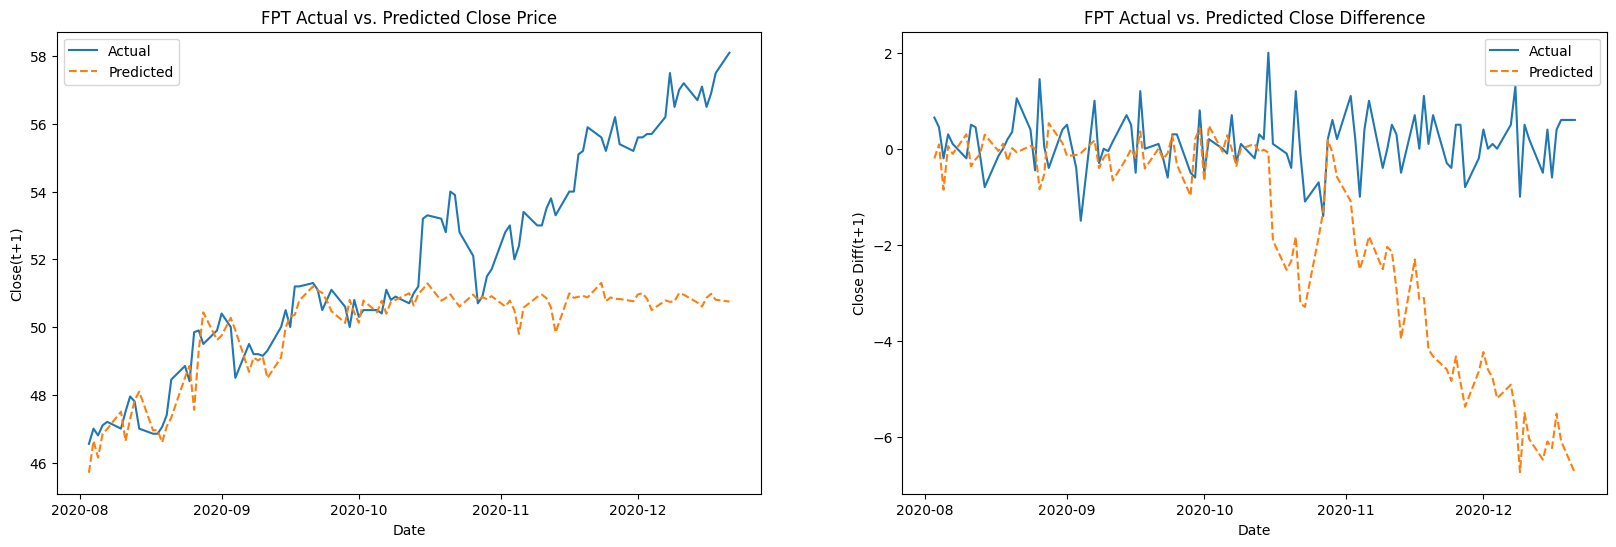

 Evaluation metrics for MSN: 
MSE = 3.670255342217363
R2 Score = -0.6778586263441879


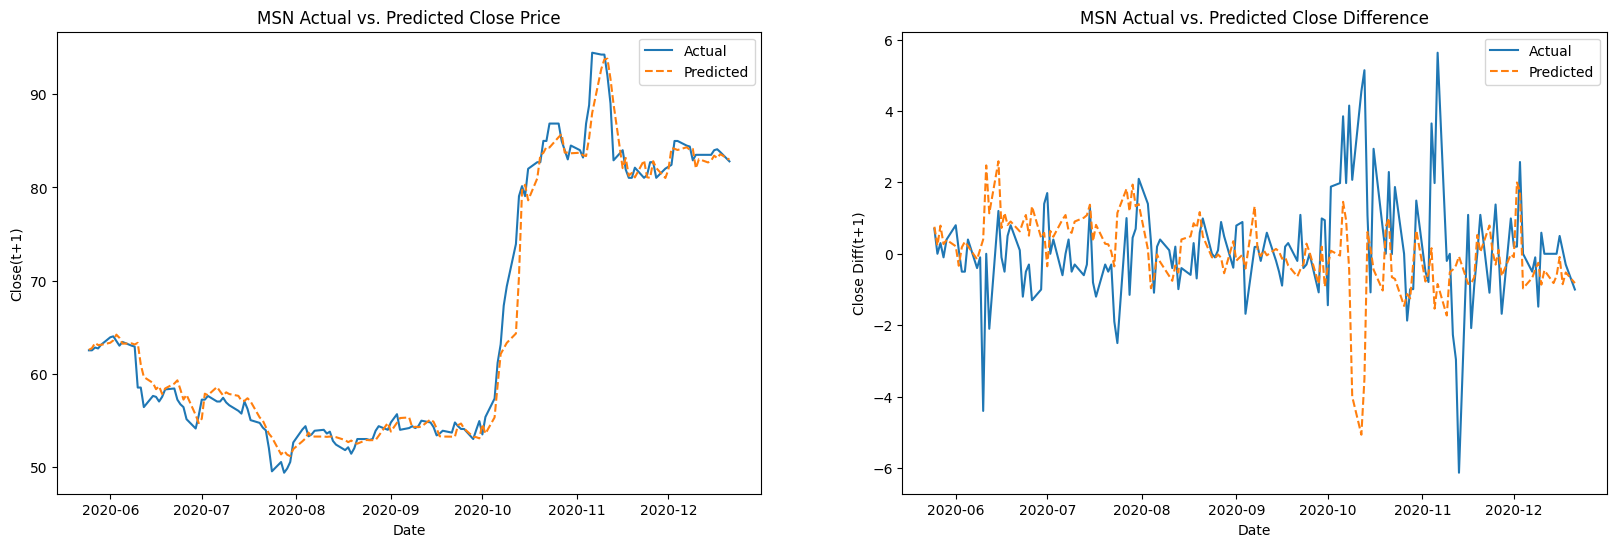

 Evaluation metrics for PNJ: 
MSE = 2.0928160554442634
R2 Score = -0.13338808772524446


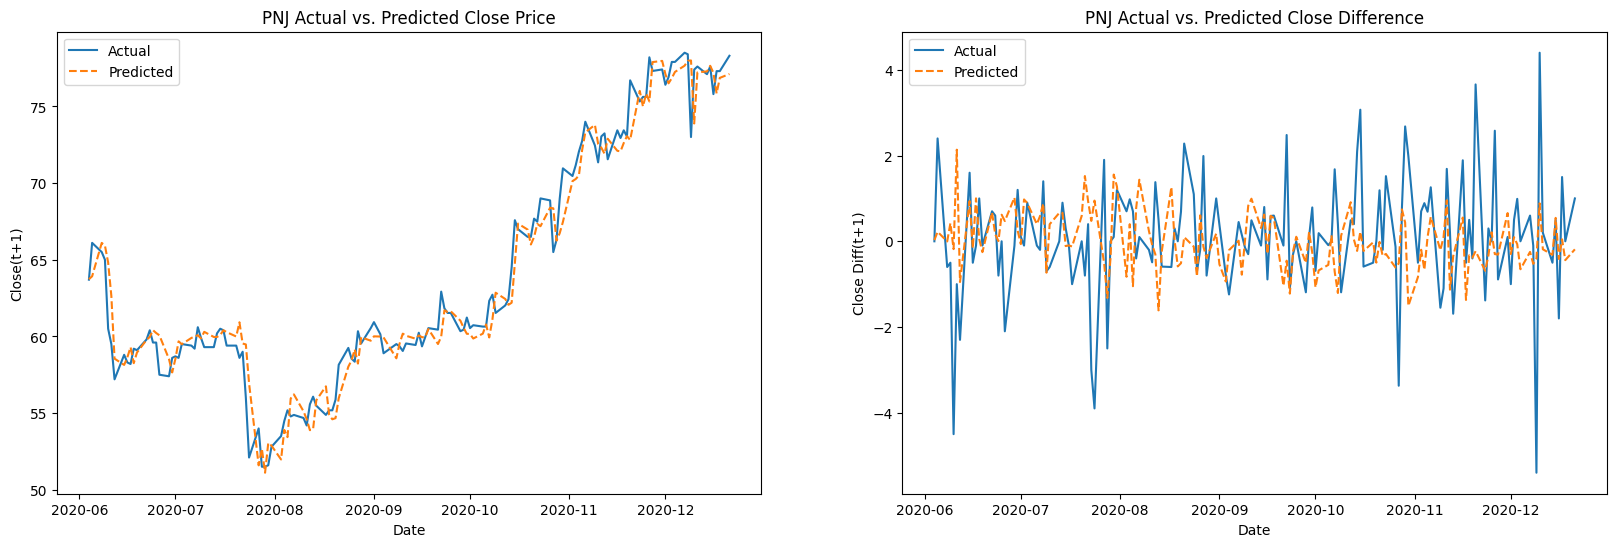

 Evaluation metrics for VIC: 
MSE = 3.2283866112496127
R2 Score = -0.3157271303676641


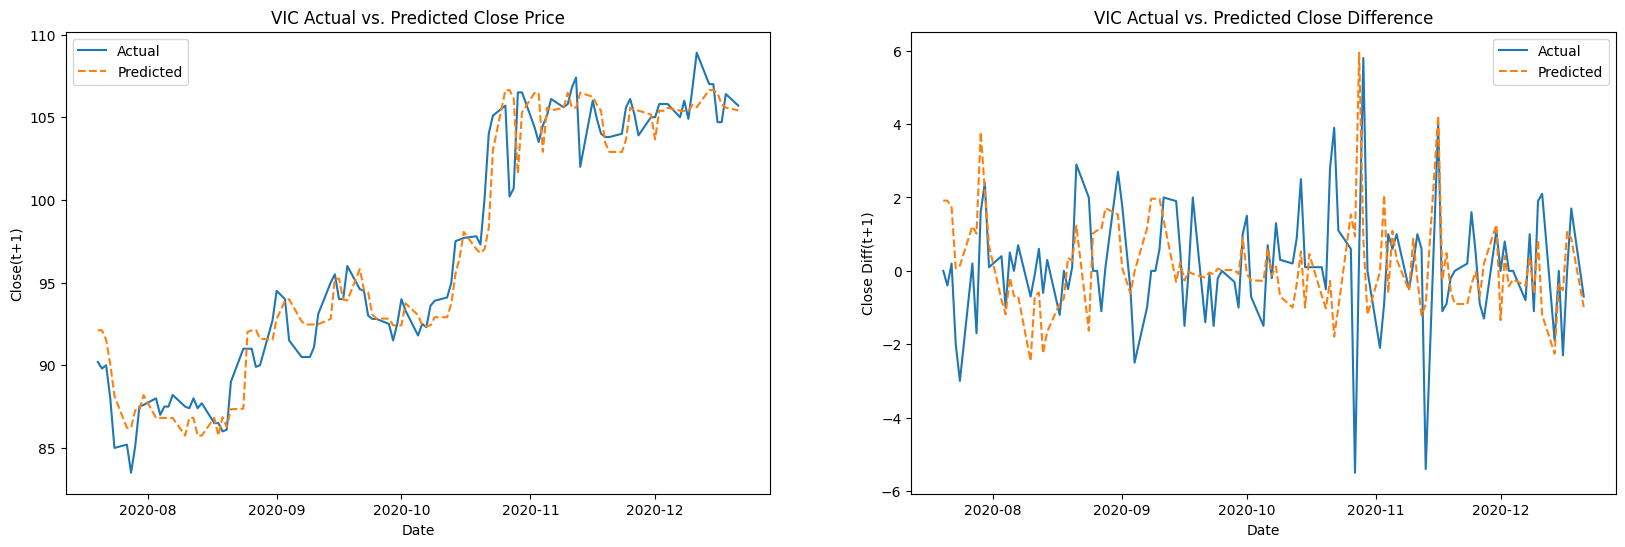

In [43]:
for model in indirect_models.values():
  model.eval()
  model.plot()

## 2. Directly predict price differences

### Define model class

In [44]:
class Direct_XGBoost_Model:
  def __init__(self, ticker, df):
        self.ticker = ticker

        df = df.drop('Close(t+1)', axis=1)

        # Scale data
        self.scaler = MinMaxScaler().set_output(transform="pandas")
        df = self.scaler.fit_transform(df)

        X = df.drop('Close Diff(t+1)', axis=1)
        y = df['Close Diff(t+1)']

        split_index = int(len(X) * 0.8)  # 80% of data for training
        self.X_train, self.X_test = X[:split_index], X[split_index:]
        self.y_train, self.y_test = y[:split_index], y[split_index:]

        self.train_dmatrix = xgb.DMatrix(data = self.X_train, label = self.y_train)
        self.test_dmatrix = xgb.DMatrix(data = self.X_test, label = self.y_test)

  def _objective(self, trial):
      params = {
          'device' : 'gpu',
          'sampling_method': 'gradient_based',
          'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]),
          'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
          'subsample': trial.suggest_float('subsample', 0.1, 1.0),
          'max_depth': trial.suggest_int('max_depth', 3, 20),
      }

      n_estimators = params.pop('n_estimators')

      model = xgb.train(params = params, dtrain = self.train_dmatrix, num_boost_round = n_estimators)
      predict = model.predict(self.test_dmatrix)

      mse = mean_squared_error(self.y_test, predict)
      return mse

  def optimize(self):
    study = optuna.create_study(direction="minimize")
    study.optimize(self._objective, n_trials=100)

    trial = study.best_trial
    print("Number of finished trials: {}".format(len(study.trials)))
    print(f"Best trial: MSE = {trial.value}\n")

    best_params = study.best_params
    n_estimators = best_params.pop('n_estimators')

    self.best_model = xgb.train(params = best_params, dtrain = self.train_dmatrix, num_boost_round = n_estimators)

  def eval(self):
    test_df = pd.concat([self.X_test, self.y_test], axis=1)
    inv_test = self.scaler.inverse_transform(test_df)
    inv_test = inv_test[:, -1]
    self.inv_test_df = pd.DataFrame(inv_test, columns=['Close Diff(t+1)'], index=test_df.index)

    pred = pd.Series(self.best_model.predict(self.test_dmatrix))
    pred.index = self.y_test.index

    pred_df = pd.concat([self.X_test, pred], axis=1)
    inv_pred = self.scaler.inverse_transform(pred_df)
    inv_pred = inv_pred[:, -1]
    self.inv_pred_df = pd.DataFrame(inv_pred, columns=['Close Diff(t+1)'], index=pred_df.index)

    print(f"\033[92m Evaluation metrics of {self.ticker}: \x1b[0m")
    print(f"MSE: {mean_squared_error(inv_test, inv_pred)}")
    print(f"R2 Score: {r2_score(inv_test, inv_pred)}")

  def plot(self):
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.lineplot(x=self.inv_test_df.index, y=self.inv_test_df['Close Diff(t+1)'], label="Actual", ax=ax)
    sns.lineplot(x=self.inv_pred_df.index, y=self.inv_pred_df['Close Diff(t+1)'], label="Predicted", ax=ax, linestyle='dashed')

    ax.set_title(f"{self.ticker} Actual vs. Predicted Close Diff")
    plt.show()

### Train separate model for each ticker

In [45]:
direct_models = {}
for df, ticker in zip(data, tickers):
  print(f"\033[92m Training {ticker} model: \x1b[0m")
  direct_models[ticker] = Direct_XGBoost_Model(ticker, df)
  direct_models[ticker].optimize()

[I 2024-10-14 15:57:53,419] A new study created in memory with name: no-name-e0670da8-2d05-4e04-9e03-875bb4454449


 Training FPT model: 


[I 2024-10-14 15:57:55,682] Trial 0 finished with value: 0.02121610177246065 and parameters: {'learning_rate': 0.018, 'n_estimators': 800, 'subsample': 0.10259389329420832, 'max_depth': 16}. Best is trial 0 with value: 0.02121610177246065.
[I 2024-10-14 15:57:57,723] Trial 1 finished with value: 0.025658226826149013 and parameters: {'learning_rate': 0.012, 'n_estimators': 949, 'subsample': 0.251366157499174, 'max_depth': 6}. Best is trial 0 with value: 0.02121610177246065.
[I 2024-10-14 15:57:59,628] Trial 2 finished with value: 0.022140681047934173 and parameters: {'learning_rate': 0.016, 'n_estimators': 760, 'subsample': 0.6202136588057846, 'max_depth': 7}. Best is trial 0 with value: 0.02121610177246065.
[I 2024-10-14 15:58:00,989] Trial 3 finished with value: 0.02500291136881968 and parameters: {'learning_rate': 0.02, 'n_estimators': 454, 'subsample': 0.21575729404519506, 'max_depth': 14}. Best is trial 0 with value: 0.02121610177246065.
[I 2024-10-14 15:58:03,309] Trial 4 finished

Number of finished trials: 100
Best trial: MSE = 0.013537244078499282

 Training MSN model: 


[I 2024-10-14 16:00:14,600] Trial 0 finished with value: 0.012442067048621488 and parameters: {'learning_rate': 0.012, 'n_estimators': 851, 'subsample': 0.7209646440202168, 'max_depth': 4}. Best is trial 0 with value: 0.012442067048621488.
[I 2024-10-14 16:00:16,046] Trial 1 finished with value: 0.011846257469613042 and parameters: {'learning_rate': 0.008, 'n_estimators': 659, 'subsample': 0.13135988041219646, 'max_depth': 9}. Best is trial 1 with value: 0.011846257469613042.
[I 2024-10-14 16:00:18,456] Trial 2 finished with value: 0.014659512105944949 and parameters: {'learning_rate': 0.016, 'n_estimators': 466, 'subsample': 0.4980325154711076, 'max_depth': 16}. Best is trial 1 with value: 0.011846257469613042.
[I 2024-10-14 16:00:19,425] Trial 3 finished with value: 0.012029601004773249 and parameters: {'learning_rate': 0.018, 'n_estimators': 696, 'subsample': 0.6247881058479721, 'max_depth': 3}. Best is trial 1 with value: 0.011846257469613042.
[I 2024-10-14 16:00:21,498] Trial 4 fi

Number of finished trials: 100
Best trial: MSE = 0.01107973520335561



[I 2024-10-14 16:02:36,193] A new study created in memory with name: no-name-422186ad-c98c-482e-a32c-4811abca0558


 Training PNJ model: 


[I 2024-10-14 16:02:39,922] Trial 0 finished with value: 0.019072598525497086 and parameters: {'learning_rate': 0.014, 'n_estimators': 662, 'subsample': 0.7645038471820436, 'max_depth': 17}. Best is trial 0 with value: 0.019072598525497086.
[I 2024-10-14 16:02:43,702] Trial 1 finished with value: 0.019535935185453046 and parameters: {'learning_rate': 0.01, 'n_estimators': 665, 'subsample': 0.6020291192463303, 'max_depth': 18}. Best is trial 0 with value: 0.019072598525497086.
[I 2024-10-14 16:02:44,531] Trial 2 finished with value: 0.013999830497286155 and parameters: {'learning_rate': 0.014, 'n_estimators': 786, 'subsample': 0.9488291352527626, 'max_depth': 3}. Best is trial 2 with value: 0.013999830497286155.
[I 2024-10-14 16:02:47,370] Trial 3 finished with value: 0.017363997153502665 and parameters: {'learning_rate': 0.008, 'n_estimators': 649, 'subsample': 0.32782745521789813, 'max_depth': 20}. Best is trial 2 with value: 0.013999830497286155.
[I 2024-10-14 16:02:49,541] Trial 4 f

Number of finished trials: 100
Best trial: MSE = 0.013350888907316196



[I 2024-10-14 16:05:11,287] A new study created in memory with name: no-name-32884ec4-d339-40e0-9a4f-62ccd0a414ce


 Training VIC model: 


[I 2024-10-14 16:05:12,704] Trial 0 finished with value: 0.031229961186618173 and parameters: {'learning_rate': 0.012, 'n_estimators': 559, 'subsample': 0.21824346511010467, 'max_depth': 11}. Best is trial 0 with value: 0.031229961186618173.
[I 2024-10-14 16:05:14,183] Trial 1 finished with value: 0.023189390016615803 and parameters: {'learning_rate': 0.012, 'n_estimators': 613, 'subsample': 0.7776806440450788, 'max_depth': 8}. Best is trial 1 with value: 0.023189390016615803.
[I 2024-10-14 16:05:17,955] Trial 2 finished with value: 0.030758339252578985 and parameters: {'learning_rate': 0.016, 'n_estimators': 801, 'subsample': 0.8011898545501399, 'max_depth': 14}. Best is trial 1 with value: 0.023189390016615803.
[I 2024-10-14 16:05:20,458] Trial 3 finished with value: 0.03062491977588406 and parameters: {'learning_rate': 0.012, 'n_estimators': 506, 'subsample': 0.6902428111467211, 'max_depth': 20}. Best is trial 1 with value: 0.023189390016615803.
[I 2024-10-14 16:05:22,933] Trial 4 f

Number of finished trials: 100
Best trial: MSE = 0.014292080342582435



### Visualize results

 Evaluation metrics of FPT: 
MSE: 0.43618970103385235
R2 Score: -0.20555669465654391


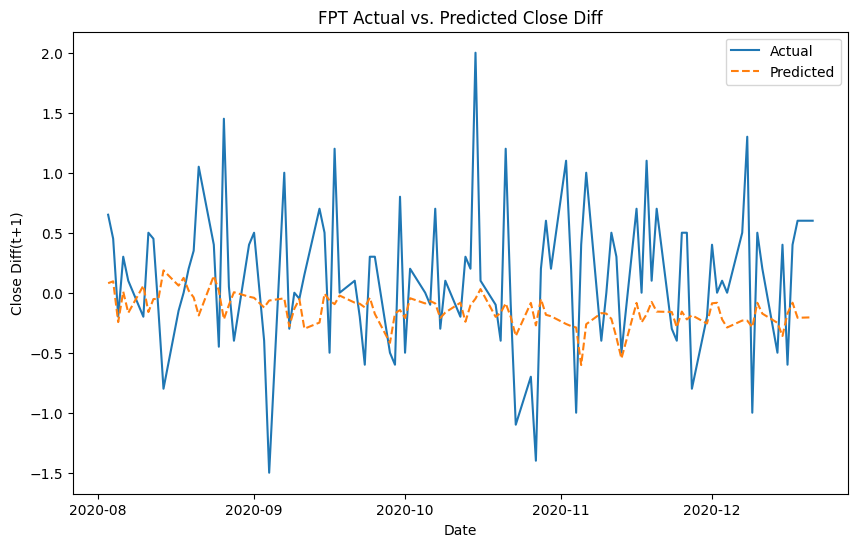

 Evaluation metrics of MSN: 
MSE: 2.25081977546823
R2 Score: -0.028963116864199723


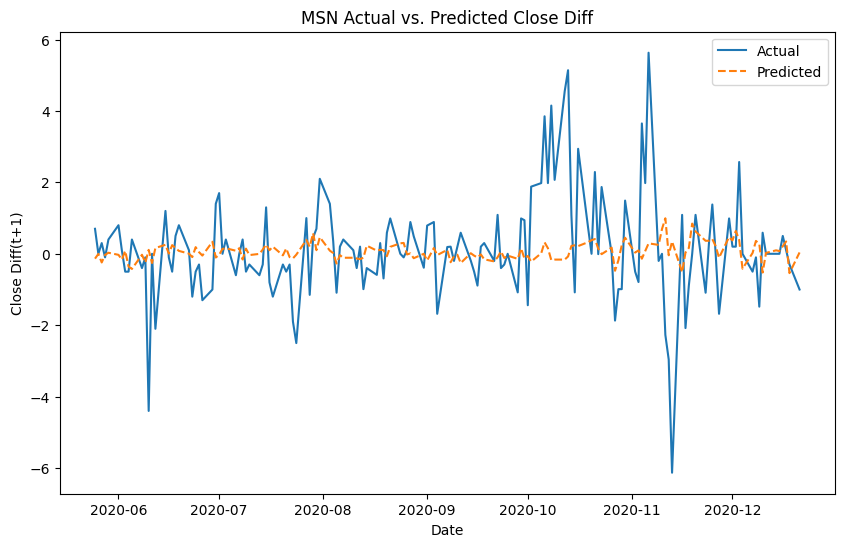

 Evaluation metrics of PNJ: 
MSE: 2.1061618812068263
R2 Score: -0.14061566986310003


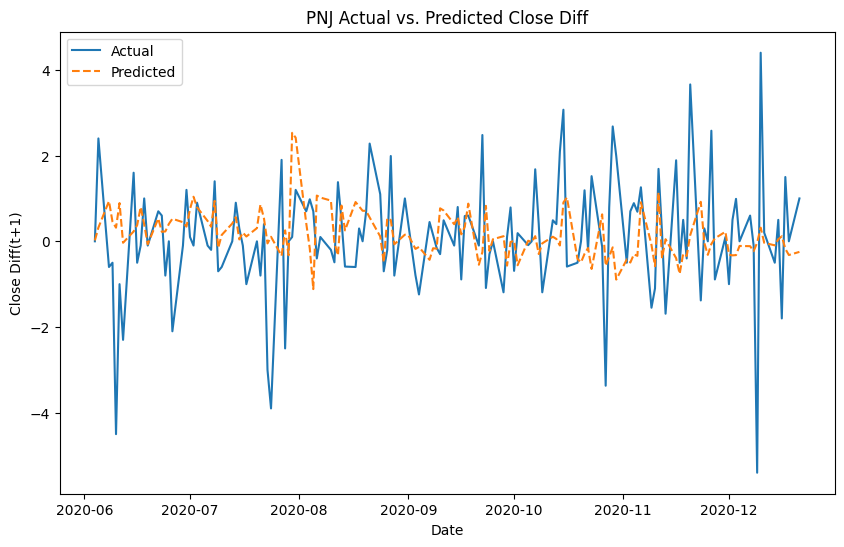

 Evaluation metrics of VIC: 
MSE: 2.653535437036074
R2 Score: -0.08144686071194851


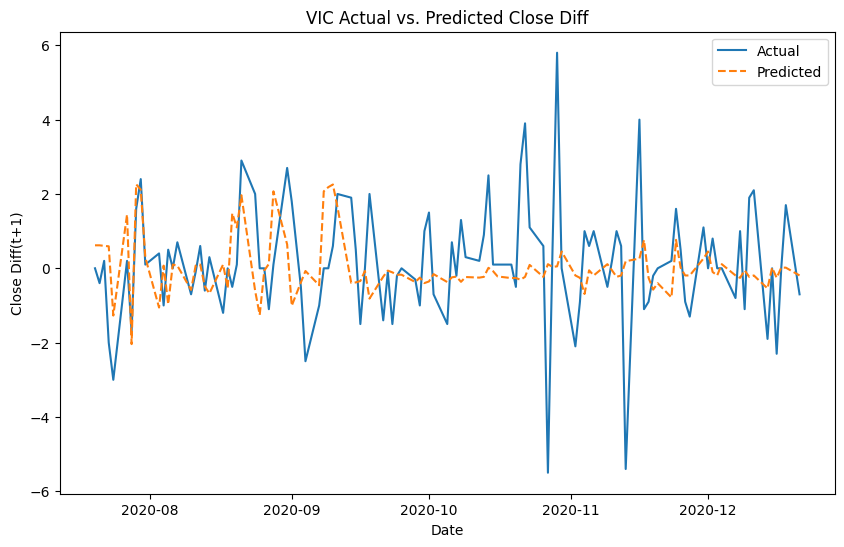

In [46]:
for model in direct_models.values():
  model.eval()
  model.plot()